# Make Paper Figures

This notebook is used to produce the final figures as included within the manuscript.

In [1]:
from funcs import get_parc_sizes, clean_col_names
from plot_funcs import (get_results, plot_avg_ranks, get_ranks_sizes, get_across_ranks, add_extra_ticks,
                        get_single_vs_multiple_df, mean_score,
                        get_results_df, get_intra_pipeline_df, get_highest_performing_df,
                        clean_model_names)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

/home/sage/anaconda3/envs/bpt/lib/python3.9/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [2]:
# Load results
results = get_results('../exp/results')
parc_sizes = get_parc_sizes(everything=True)

static = {'random': True, 'base': True, 'fs': True, 'ico': True}

Found: 87390 Incomplete: 0


# Averaged Performance-Size Scaling

### Figure 2 - Mean across pipelines

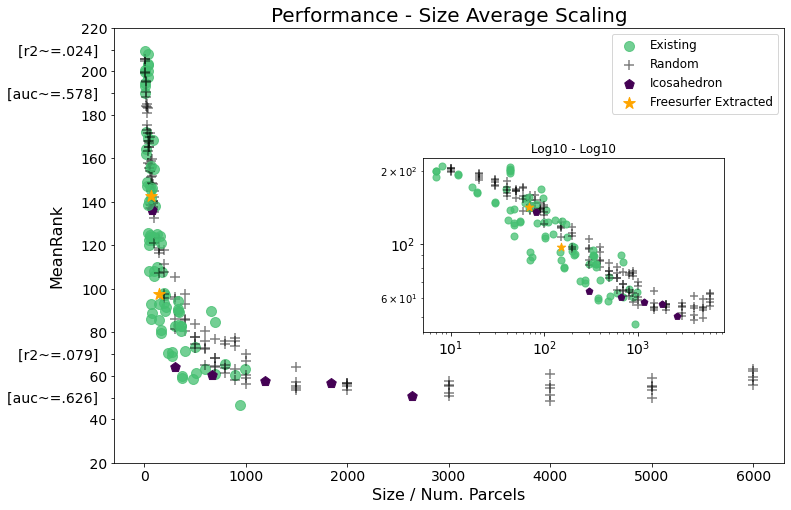

In [3]:
# Main figure + subplot
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
axins = inset_axes(ax, width="45%", height="40%", borderpad=6, loc=7)

plot_avg_ranks(results, log=False, ax=ax, **static)
plot_avg_ranks(results, log=True, ax=axins, sm=.5, **static)

axins.set_xlabel('')
axins.set_ylabel('')
axins.set_title('Log10 - Log10')
axins.get_legend().remove()

# Get reference for adding r2 ticks
ref = get_ranks_sizes(results, log=False, by_group=False, add_raw=True, **static)

add_extra_ticks(ax, ref, r2_extra_ticks=[210, 70],
                         roc_extra_ticks=[190, 50])

ax.set_title('Performance - Size Average Scaling', fontsize=20)
plt.savefig('Figures/Figure2.png', dpi=500, bbox_inches='tight')

# Choice of Pipeline

### Figure 3 - Comparison

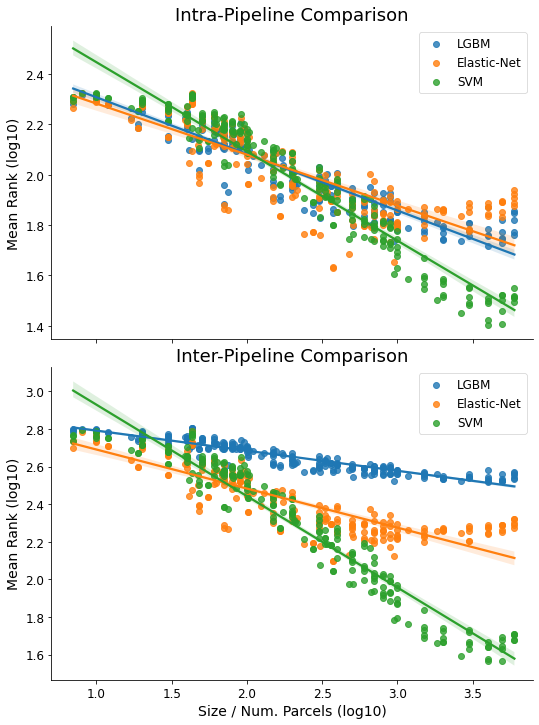

In [4]:
# Make a combined df with both intra and inter
intra_pipe_df = clean_model_names(clean_col_names(
    get_intra_pipeline_df(results, log=True, threshold=False, **static)))

inter_pipe_df = clean_model_names(clean_col_names(
    get_across_ranks(results, models=['svm', 'lgbm', 'elastic'], log=True, **static)))

intra_pipe_df['Comparison Type'] = 'Intra-Pipeline'
inter_pipe_df['Comparison Type'] = 'Inter-Pipeline'

inter_pipe_df = inter_pipe_df.drop('Parcellation', axis=1)
intra_pipe_df = intra_pipe_df.drop('Parcellation_Type', axis=1)

combined_df = pd.concat([intra_pipe_df, inter_pipe_df])
combined_df = combined_df.rename(columns={'Size': 'Num. Parcels'})

# Plot
g = sns.lmplot(y='Mean Rank', x='Num. Parcels',
               data=combined_df, hue='Pipeline',
               row='Comparison Type',
               facet_kws=dict(sharey=False),
               aspect=1.5, robust=True, legend=False)

g.set(xlim=(.7, 3.9))

sns.set_context("paper", rc={"axes.fontsize":16})  

g.axes[0][0].set_title('Intra-Pipeline Comparison', fontsize=18)
g.axes[1][0].set_title('Inter-Pipeline Comparison', fontsize=18)

# Set axis attributes / sizes
g.axes[1][0].set_xlabel('Size / Num. Parcels (log10)', fontsize=14)

for i in [0, 1]:
    g.axes[i][0].set_ylabel('Mean Rank (log10)', fontsize=14)
    g.axes[i][0].xaxis.set_tick_params(labelsize=12)
    g.axes[i][0].yaxis.set_tick_params(labelsize=12)

g.axes[0][0].legend(fontsize=12)
g.axes[1][0].legend(fontsize=12)

plt.savefig('Figures/Figure3.png', dpi=300, bbox_inches='tight')

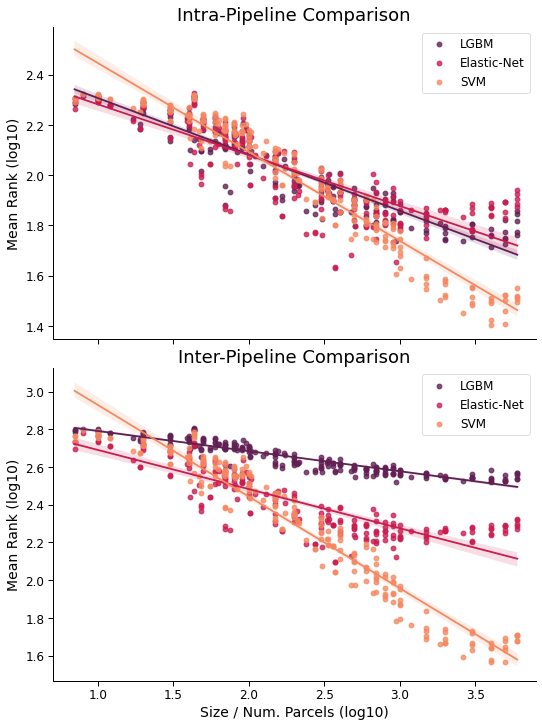

In [5]:
# Plot
g = sns.lmplot(y='Mean Rank', x='Num. Parcels',
               data=combined_df, hue='Pipeline',
               row='Comparison Type', palette="rocket",
               facet_kws=dict(sharey=False),
               aspect=1.5, robust=True, legend=False)

g.set(xlim=(.7, 3.9))

sns.set_context("paper", rc={"axes.fontsize":16})  

g.axes[0][0].set_title('Intra-Pipeline Comparison', fontsize=18)
g.axes[1][0].set_title('Inter-Pipeline Comparison', fontsize=18)

# Set axis attributes / sizes
g.axes[1][0].set_xlabel('Size / Num. Parcels (log10)', fontsize=14)

for i in [0, 1]:
    g.axes[i][0].set_ylabel('Mean Rank (log10)', fontsize=14)
    g.axes[i][0].xaxis.set_tick_params(labelsize=12)
    g.axes[i][0].yaxis.set_tick_params(labelsize=12)

g.axes[0][0].legend(fontsize=12)
g.axes[1][0].legend(fontsize=12)

plt.savefig('Figures/Figure3_alt.png', dpi=300, bbox_inches='tight')

# Variation Across Target Variable

### Figure 4 - By Target Averaged Scaling

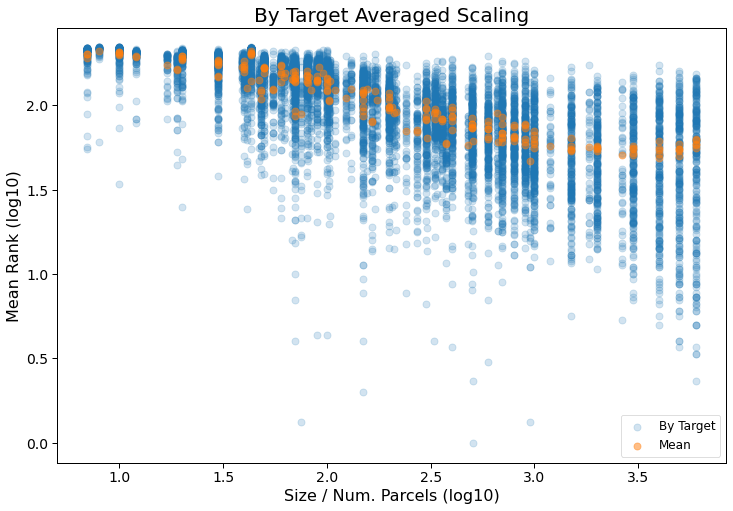

In [6]:
r_df = get_ranks_sizes(results, log=True,
                       avg_targets=False, **static)
mean_df = get_ranks_sizes(results, log=True,
                       avg_targets=True, **static)

plt.figure(figsize=(12, 8))
plt.scatter(r_df['Size'], r_df['Mean_Rank'],
            alpha=.2, s=50, label='By Target')
plt.scatter(mean_df['Size'], mean_df['Mean_Rank'],
            alpha=.5, s=50, label='Mean')
plt.legend(frameon=True, loc=4, fontsize=12)

plt.ylabel('Mean Rank (log10)', fontsize=16)
plt.xlabel('Size / Num. Parcels (log10)', fontsize=16)

plt.tick_params(labelsize=14)
plt.tick_params(labelsize=14)

plt.title('By Target Averaged Scaling', fontsize=20)
plt.savefig('Figures/Figure4.png', dpi=300, bbox_inches='tight')

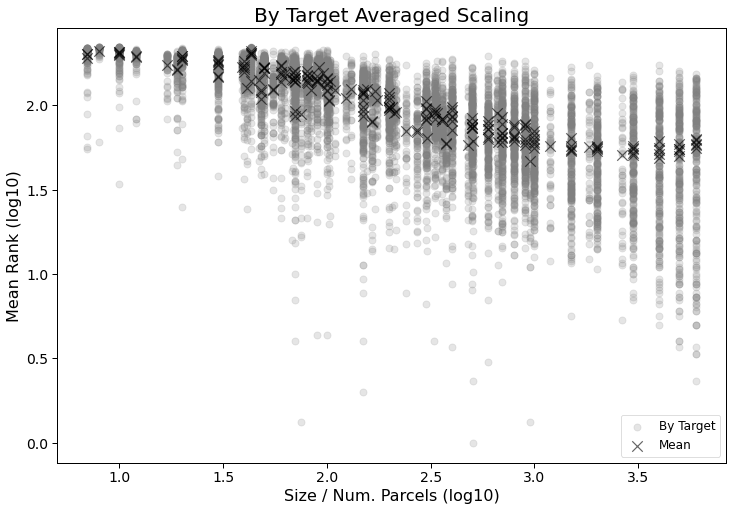

In [7]:
plt.figure(figsize=(12, 8))
plt.scatter(r_df['Size'], r_df['Mean_Rank'],
            alpha=.2, s=50, label='By Target', color='gray')
plt.scatter(mean_df['Size'], mean_df['Mean_Rank'],
            alpha=.6, s=110, label='Mean', marker='x', color='black')
plt.legend(frameon=True, loc=4, fontsize=12)

plt.ylabel('Mean Rank (log10)', fontsize=16)
plt.xlabel('Size / Num. Parcels (log10)', fontsize=16)

plt.tick_params(labelsize=14)
plt.tick_params(labelsize=14)

plt.title('By Target Averaged Scaling', fontsize=20)
plt.savefig('Figures/Figure4_alt_bw.png', dpi=300, bbox_inches='tight')

# Single vs. Multiple Parcellations

### Figure 5

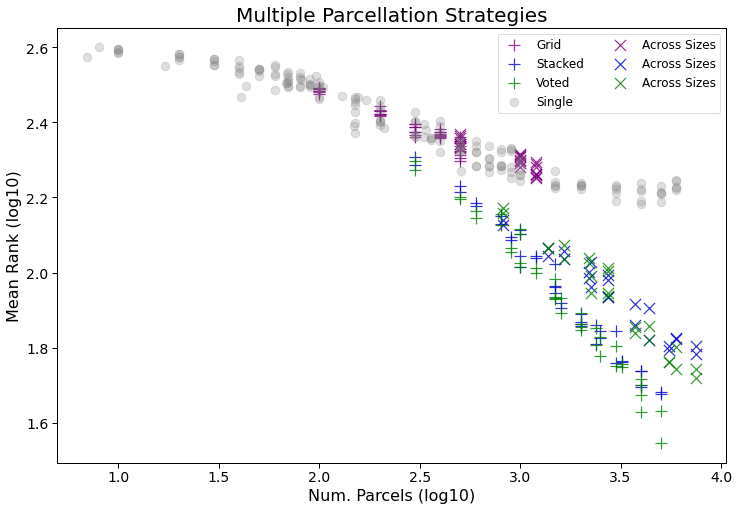

In [8]:
r_df = get_single_vs_multiple_df(results, log=True,
                                 stacked=True,
                                 voted=True, grid=True,
                                 **static)

n = r_df[r_df['across_sizes'] == 0]
ac = r_df[r_df['across_sizes'] == 1]

# Make plot
plt.figure(figsize=(12, 8))

g0, g1 = n.loc['Grid'], ac.loc['Grid']
g0_x = plt.scatter(g0['Size'], g0['Mean_Rank'],
                   marker='+', color='purple', s=125, alpha=.8)
g1_x = plt.scatter(g1['Size'], g1['Mean_Rank'],
                   marker='x', color='purple', s=125, alpha=.8)

s0, s1 = n.loc['Stacked'], ac.loc['Stacked']
s0_x = plt.scatter(s0['Size'], s0['Mean_Rank'],
                   marker='+', color='mediumblue', s=125, alpha=.8)
s1_x = plt.scatter(s1['Size'], s1['Mean_Rank'],
                   marker='x', color='mediumblue', s=125, alpha=.8)

v0, v1 = n.loc['Voted'], ac.loc['Voted']
v0_x = plt.scatter(v0['Size'], v0['Mean_Rank'],
                   marker='+', color='green', s=125, alpha=.8)
v1_x = plt.scatter(v1['Size'], v1['Mean_Rank'],
                   marker='x', color='green', s=125, alpha=.8)
s = plt.scatter(n.loc['Single']['Size'], n.loc['Single']['Mean_Rank'],
                   color='gray', s=75, alpha=.25)

plt.legend([g0_x, s0_x, v0_x, s,
            g1_x, s1_x, v1_x],
           ['Grid', 'Stacked', 'Voted', 'Single',
            'Across Sizes', 'Across Sizes', 'Across Sizes'],
           ncol=2, fontsize=12)

plt.xlabel('Num. Parcels (log10)', fontsize=16)
plt.ylabel('Mean Rank (log10)', fontsize=16)

plt.tick_params(labelsize=14)
plt.tick_params(labelsize=14)

plt.title('Multiple Parcellation Strategies', fontsize=20)
plt.savefig('Figures/Figure5.png', dpi=300, bbox_inches='tight')

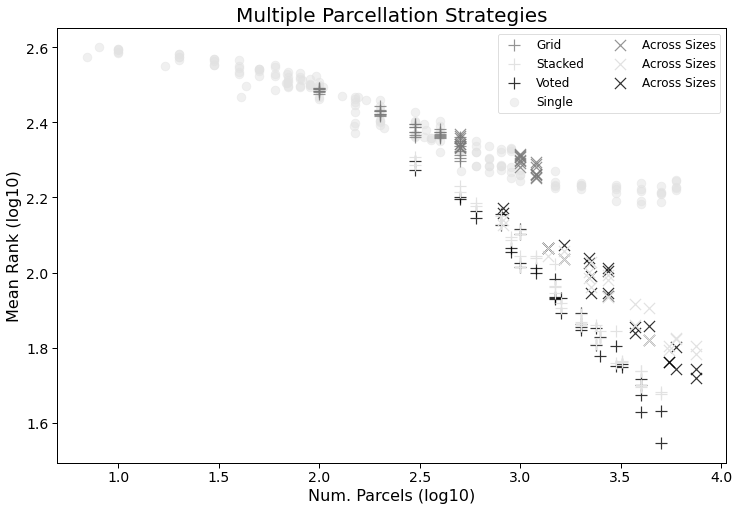

In [9]:
colors = sns.color_palette("Greys", 4)

# Make plot
plt.figure(figsize=(12, 8))

s = plt.scatter(n.loc['Single']['Size'], n.loc['Single']['Mean_Rank'],
                   color=colors[0], s=75, alpha=.5)

g0, g1 = n.loc['Grid'], ac.loc['Grid']
g0_x = plt.scatter(g0['Size'], g0['Mean_Rank'],
                   marker='+', color=colors[2], s=125, alpha=.8)
g1_x = plt.scatter(g1['Size'], g1['Mean_Rank'],
                   marker='x', color=colors[2], s=125, alpha=.8)

v0, v1 = n.loc['Voted'], ac.loc['Voted']
v0_x = plt.scatter(v0['Size'], v0['Mean_Rank'],
                   marker='+', color='black', s=125, alpha=.8)
v1_x = plt.scatter(v1['Size'], v1['Mean_Rank'],
                   marker='x', color='black', s=125, alpha=.8)

s0, s1 = n.loc['Stacked'], ac.loc['Stacked']
s0_x = plt.scatter(s0['Size'], s0['Mean_Rank'],
                   marker='+', color=colors[0], s=125, alpha=1)
s1_x = plt.scatter(s1['Size'], s1['Mean_Rank'],
                   marker='x', color=colors[0], s=125, alpha=1)



plt.legend([g0_x, s0_x, v0_x, s,
            g1_x, s1_x, v1_x],
           ['Grid', 'Stacked', 'Voted', 'Single',
            'Across Sizes', 'Across Sizes', 'Across Sizes'],
           ncol=2, fontsize=12)

plt.xlabel('Num. Parcels (log10)', fontsize=16)
plt.ylabel('Mean Rank (log10)', fontsize=16)

plt.tick_params(labelsize=14)
plt.tick_params(labelsize=14)

plt.title('Multiple Parcellation Strategies', fontsize=20)
plt.savefig('Figures/Figure5_alt_bw.png', dpi=300, bbox_inches='tight')

# Highest Performance

### Figure 6

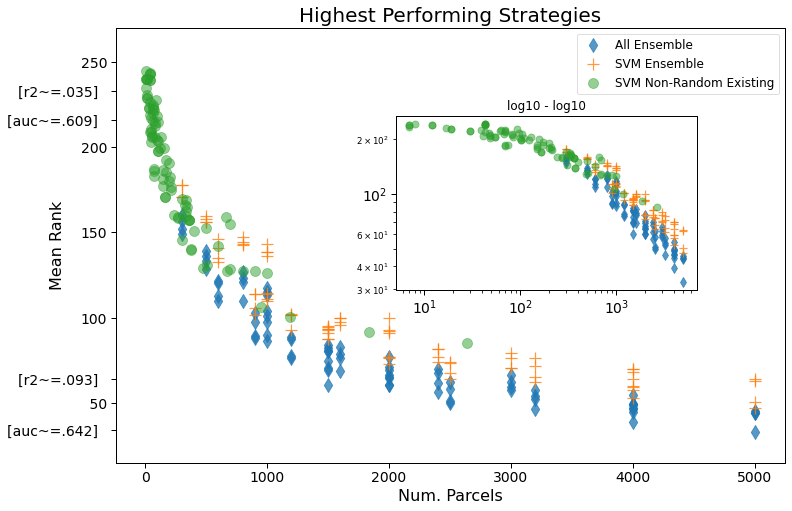

In [10]:
# Get scores df
scores = get_highest_performing_df(results)

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

plt.title('Highest Performing Strategies', fontsize=20)
axins = inset_axes(ax, width="45%", height="40%", borderpad=10)
plt.title('log10 - log10', fontsize=12)

for i, a in enumerate([ax, axins]):
    
    j = i + 1
    
    if i == 1:
        a.set_xscale('log')
        a.set_yscale('log')

    a.scatter(scores.loc['all', 'Size'],
              scores.loc['all', 'Mean_Rank'],
              label='All Ensemble', s=100 // j, marker='d', alpha=.75)

    a.scatter(scores.loc['svm', 'Size'],
              scores.loc['svm', 'Mean_Rank'],
              label='SVM Ensemble', s=125 // j, marker='+', alpha=.8)

    a.scatter(scores.loc['existing', 'Size'],
              scores.loc['existing', 'Mean_Rank'],
              label='SVM Non-Random Existing', s=100 // j, alpha=.5)
    
ax.set_ylabel('Mean Rank', fontsize=16)
ax.set_xlabel('Num. Parcels', fontsize=16)


# Add custom ticks
ref = scores.copy().set_index('Parcellation')

add_extra_ticks(ax, ref, r2_extra_ticks=[233, 64],
                         roc_extra_ticks=[216, 34])

# Sizes
ax.legend(fontsize=12)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
axins.xaxis.set_tick_params(labelsize=14)
axins.yaxis.set_tick_params(labelsize=14)

ax.set_ylim(bottom=15, top=270)

plt.savefig('Figures/Figure6.png', dpi=300, bbox_inches='tight')

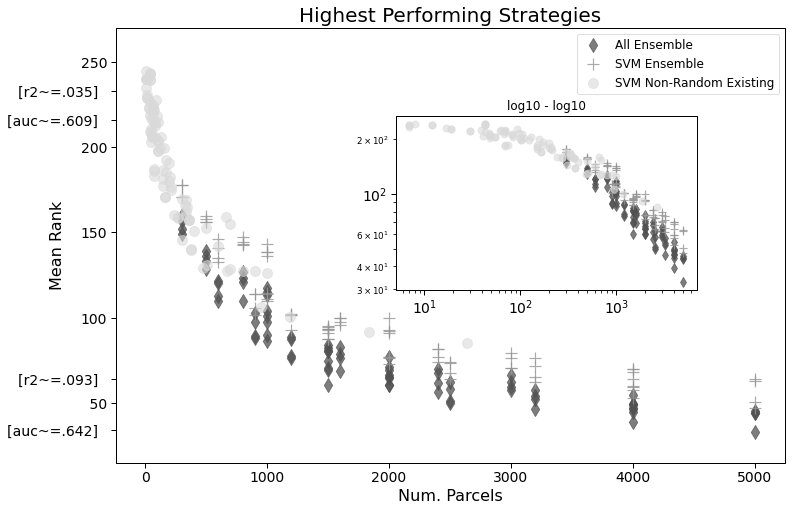

In [11]:
colors = sns.color_palette("Greys", 3)

# Get scores df
scores = get_highest_performing_df(results)

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

plt.title('Highest Performing Strategies', fontsize=20)
axins = inset_axes(ax, width="45%", height="40%", borderpad=10)
plt.title('log10 - log10', fontsize=12)

for i, a in enumerate([ax, axins]):
    
    j = i + 1
    
    if i == 1:
        a.set_xscale('log')
        a.set_yscale('log')

    a.scatter(scores.loc['all', 'Size'],
              scores.loc['all', 'Mean_Rank'],
              label='All Ensemble', s=100 // j, marker='d', alpha=.75, color=colors[2])

    a.scatter(scores.loc['svm', 'Size'],
              scores.loc['svm', 'Mean_Rank'],
              label='SVM Ensemble', s=125 // j, marker='+', alpha=.8, color=colors[1])

    a.scatter(scores.loc['existing', 'Size'],
              scores.loc['existing', 'Mean_Rank'],
              label='SVM Non-Random Existing', s=100 // j, alpha=.6, color=colors[0])
    
ax.set_ylabel('Mean Rank', fontsize=16)
ax.set_xlabel('Num. Parcels', fontsize=16)


# Add custom ticks
ref = scores.copy().set_index('Parcellation')

add_extra_ticks(ax, ref, r2_extra_ticks=[233, 64],
                         roc_extra_ticks=[216, 34])

# Sizes
ax.legend(fontsize=12)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
axins.xaxis.set_tick_params(labelsize=14)
axins.yaxis.set_tick_params(labelsize=14)

ax.set_ylim(bottom=15, top=270)

plt.savefig('Figures/Figure6_alt_bw.png', dpi=300, bbox_inches='tight')

Save black white versions...

In [12]:
from PIL import Image

for i in range(1, 7):
    Image.open(f'Figures/Figure{i}.png').convert('L').save(f'Figures/Figure{i}_bw.png')
    
Image.open(f'Figures/Figure3_alt.png').convert('L').save(f'Figures/Figure3_alt_bw.png')